In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def generate_connectivity_matrix(Num, num_blocks, connected_blocks, p_intra=0.25, p_bg=0.05, p_inter=0.15):
    mat=np.random.choice([0,1],size=(Num,Num),p=[1-p_bg,p_bg]) ## generate background matrix with p_bg
    block_size=int(Num/num_blocks)
    #print("block size: ", block_size)
    block_indices=np.arange(0,Num+1,block_size)
    #print("block indexes: ", block_indices)
    for i1 in range(num_blocks): ### for intra block probabilities
        start_index=block_indices[i1]
        stop_index=block_indices[i1+1]
        mat[start_index:stop_index,start_index:stop_index]=np.random.choice([0,1],size=(block_size,block_size),p=[1-p_intra,p_intra])
    for j1,k1 in connected_blocks: ### for inter block probabilities
        mat[block_indices[j1]:block_indices[j1+1],block_indices[k1]:block_indices[k1+1]]=np.random.choice([0,1],size=(block_size,block_size),p=[1-p_inter,p_inter])
    #This function returns the connectivity matrix
    return mat

### To use the connectvitiy matrix in brian, you must do the following:
connecivity_matrix = generate_connectivity_matrix(Num,num_blocks,connected_blocks) # first generate the connectivity matrix

pre_indices,post_indices = connecivity_matrix.nonzero() ## extract indexes of non-zero elements in the connectivity matrix

### The non-zero indexes are the arguments for the synapses functions. You can use it in the following manner
synapses_e2e.connect(i=pre_indices,j=post_indices)
### for e2i, i2i, i2e, we want to connect with the average probabilities. this is just the sum of the connectivity matrix divided by size
average_p=np.sum(connecivity_matrix)/(connecivity_matrix.size)

synapses_e2i.connect(p=average_p)

synapses_i2i.connect(p=average_p)

synapses_i2e.connect(p=average_p)

In [15]:
def generate_structure_matrix(num_blocks, connected_blocks):
    #This function is only for the blocks. not a connectivity matrix
    mat=np.zeros((num_blocks,Num_blocks))
    for i0 in range(num_blocks): #for all self connections
        mat[i0,i0]=1
    for i2,j2 in connected_blocks: #interconnected blocks
        mat[i2,j2]=1
    return mat

In [16]:
N=1000
n=10
#connected_pairs=np.random.randint(0,n,size=(4,2))
connected_pairs=[[3,4],[4,5],[5,6],[4,3],[5,4],[6,5]]

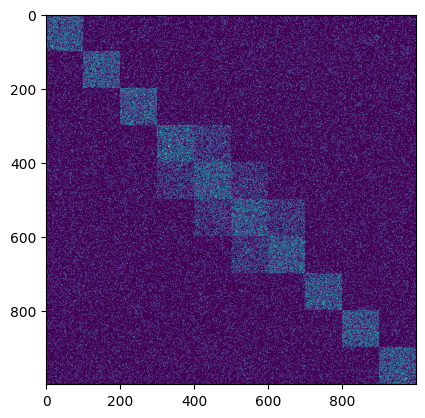

In [17]:
conmat=generate_connectivity_matrix(N,n,connected_pairs)
plt.imshow(conmat)

In [20]:
conmat.size

1000000